In [1]:
import pandas as pd
import matplotlib.pyplot as plt

water = pd.read_csv(r"C:\Users\User\School\Set5\ADS\P3\water_potability.csv")

water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [2]:
def histogram(df, i):
    plt.hist(df[f'{i}'])
    plt.xlabel(f'{i}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {i}')
    plt.grid(True)
    plt.show()

In [3]:
safe_df = water[water['Potability'] == 1]
unsafe_df = water[water['Potability'] == 0]

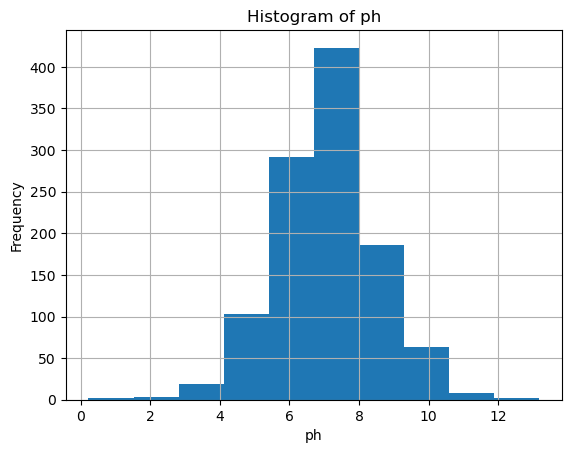

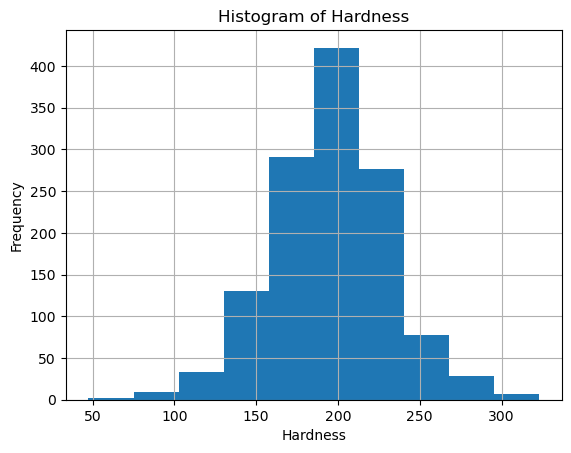

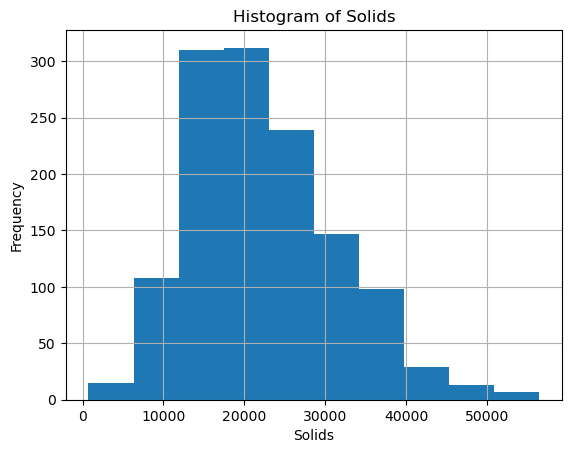

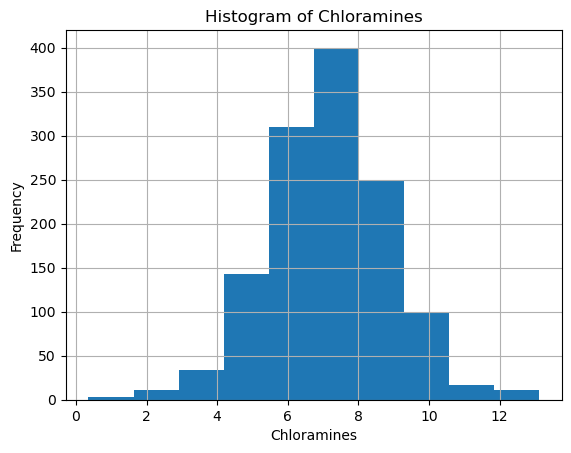

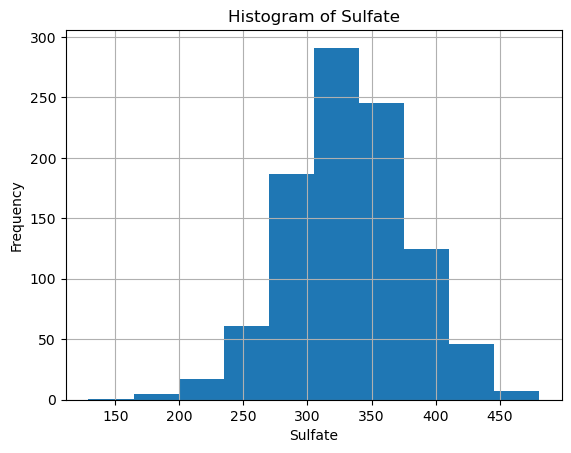

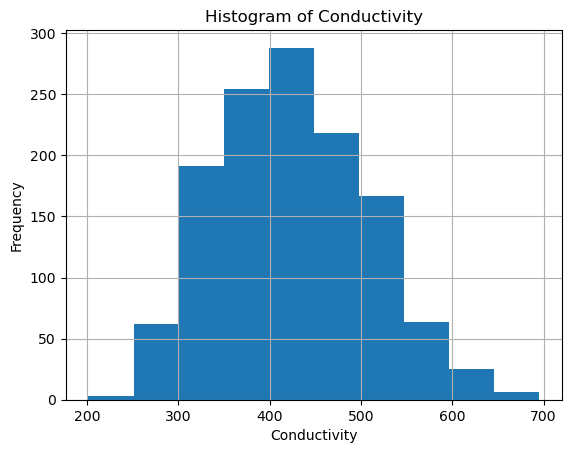

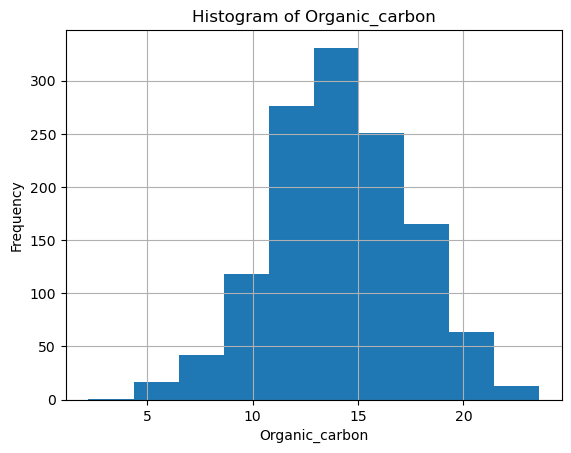

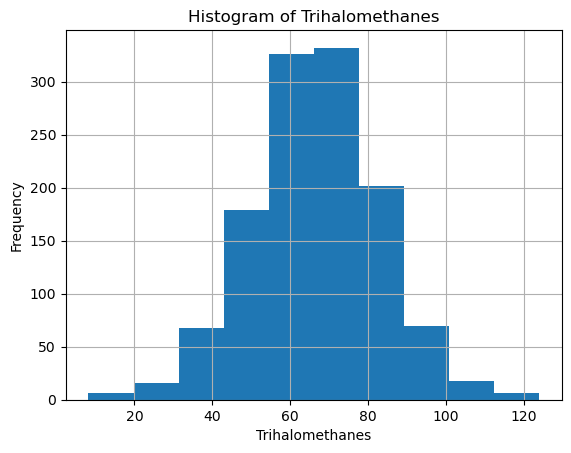

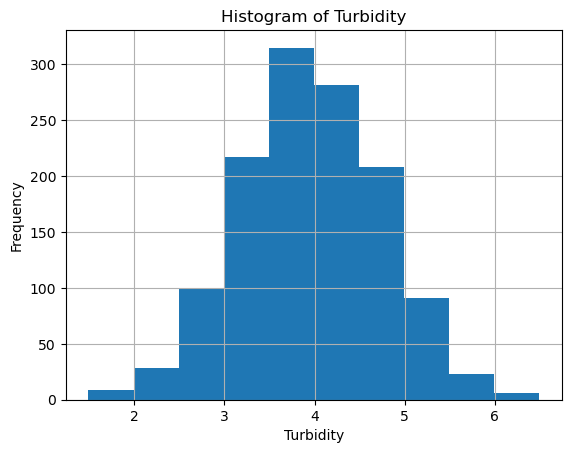

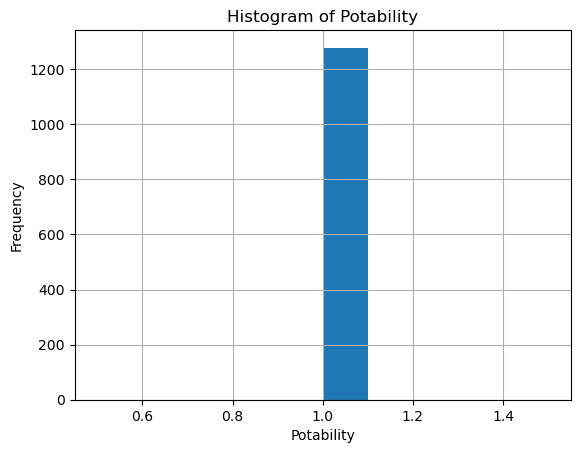

In [4]:
for column in safe_df:
    histogram(safe_df, column)

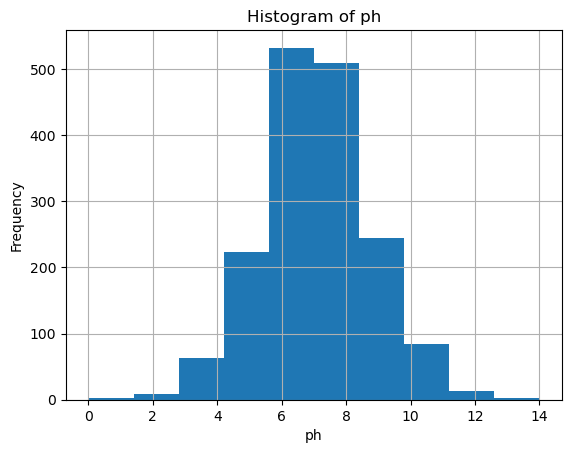

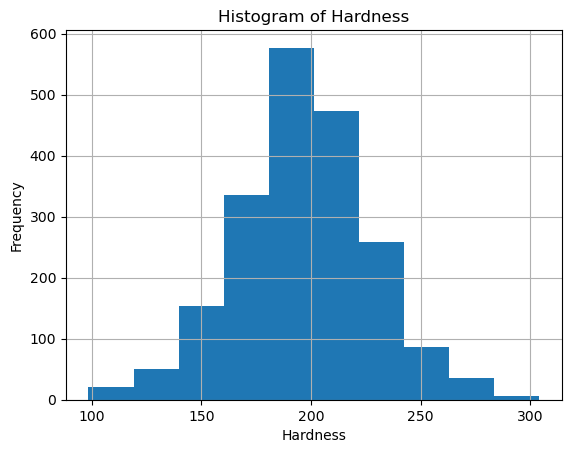

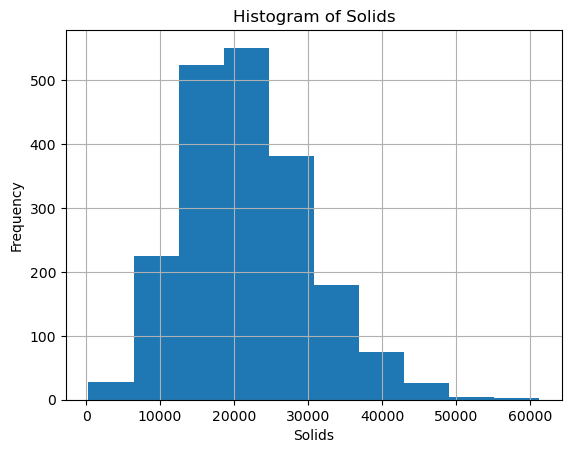

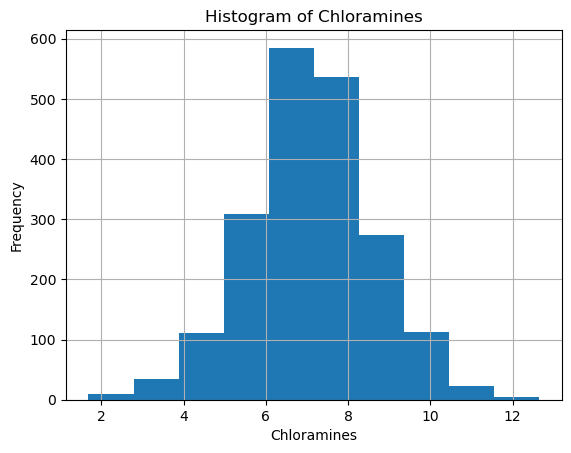

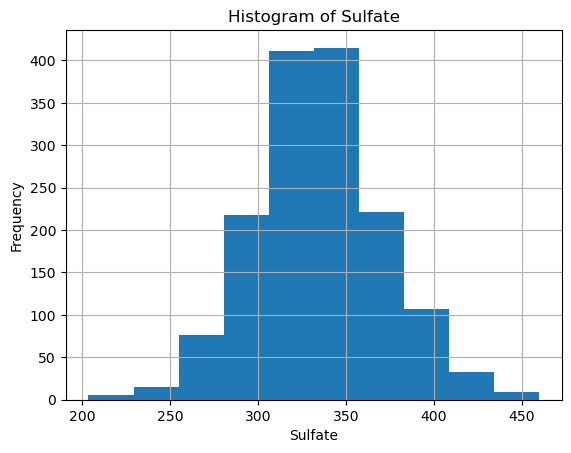

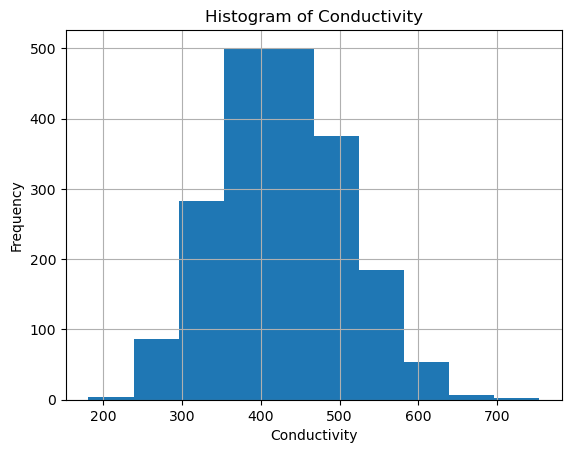

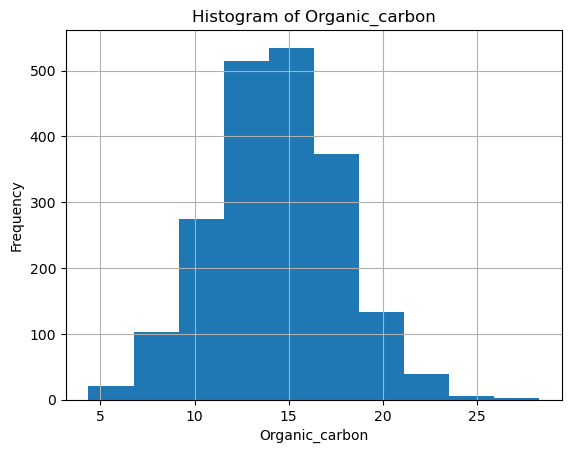

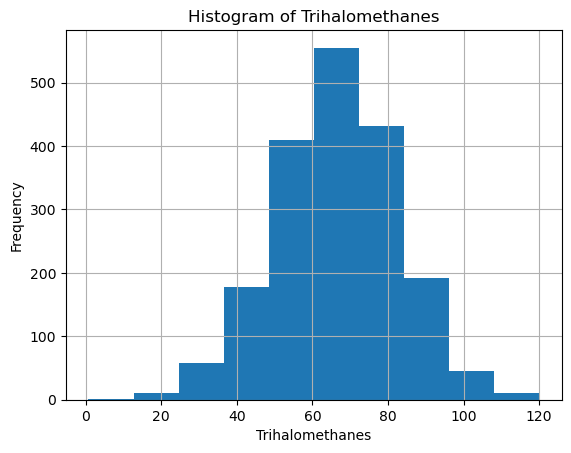

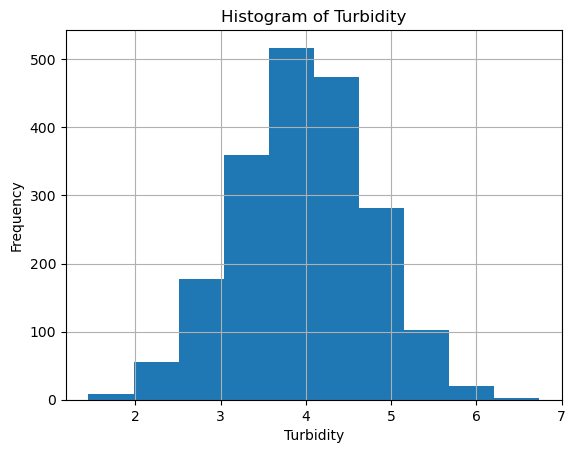

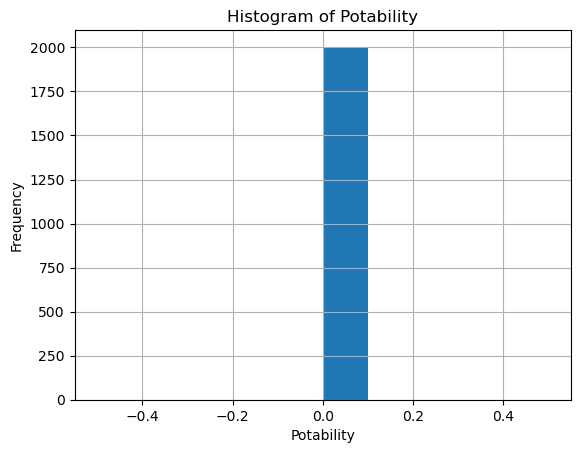

In [5]:
for column in unsafe_df:
    histogram(unsafe_df, column)

In [6]:
# Models

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [8]:
X = water.drop('Potability', axis=1)
y = water['Potability']

In [9]:
# Handle NaNs
from sklearn.impute import SimpleImputer

In [10]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=1)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Logistic Regression
logreg_model = LogisticRegression()

In [14]:
logreg_model.fit(X_train_scaled, y_train)

logreg_predictions = logreg_model.predict(X_test_scaled)

print("LR Accuracy:", accuracy_score(y_test, logreg_predictions))
print("LR Classification Report:\n", classification_report(y_test, logreg_predictions))

LR Accuracy: 0.5701219512195121
LR Classification Report:
               precision    recall  f1-score   support

           0       0.57      1.00      0.73       373
           1       1.00      0.00      0.01       283

    accuracy                           0.57       656
   macro avg       0.78      0.50      0.37       656
weighted avg       0.76      0.57      0.42       656



In [15]:
# Random Forest
rf_model = RandomForestClassifier()

In [16]:
rf_model.fit(X_train_scaled, y_train)

rf_predictions = rf_model.predict(X_test_scaled)

print("RF Accuracy:", accuracy_score(y_test, rf_predictions))
print("RF Classification Report:\n", classification_report(y_test, rf_predictions))

RF Accuracy: 0.6600609756097561
RF Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.91      0.75       373
           1       0.73      0.33      0.46       283

    accuracy                           0.66       656
   macro avg       0.69      0.62      0.60       656
weighted avg       0.68      0.66      0.63       656



In [17]:
# SVC
svm_model = SVC()

In [18]:
svm_model.fit(X_train_scaled, y_train)

svm_predictions = svm_model.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))

SVM Accuracy: 0.6615853658536586
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.95      0.76       373
           1       0.80      0.29      0.42       283

    accuracy                           0.66       656
   macro avg       0.72      0.62      0.59       656
weighted avg       0.71      0.66      0.61       656



In [20]:
# Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [21]:
cm = confusion_matrix(y_test, svm_predictions)

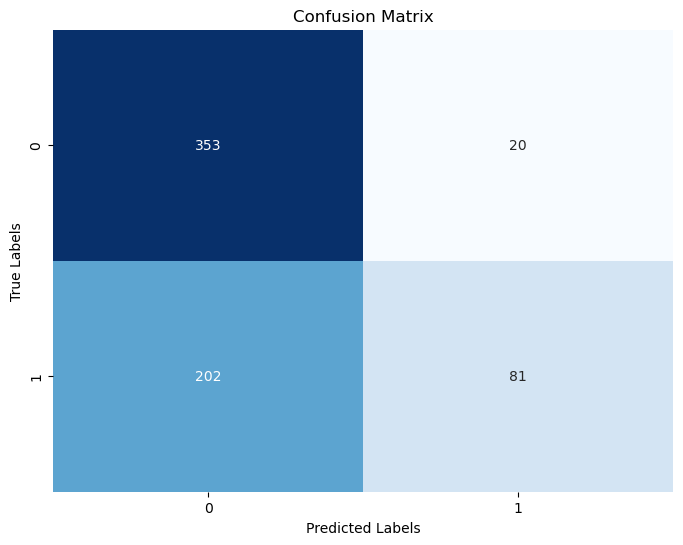

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()